# cifar10 彩色圖像辨識

## 步驟1：載入 Cifar 10 資料

In [1]:
import tensorflow as tf
cifar10 = tf.keras.datasets.cifar10

# 載入 MNIST 手寫阿拉伯數字資料
(x_train, y_train),(x_test, y_test) = cifar10.load_data()

# 訓練/測試資料的 X/y 維度
print(x_train.shape, y_train.shape,x_test.shape, y_test.shape)

(50000, 32, 32, 3) (50000, 1) (10000, 32, 32, 3) (10000, 1)


## 步驟2：資料清理，此步驟無需進行

## 步驟3：進行特徵工程，將特徵縮放成(0, 1)之間

In [2]:
# 特徵縮放，使用常態化(Normalization)，公式 = (x - min) / (max - min)
# 顏色範圍：0~255，所以，公式簡化為 x / 255
# 注意，顏色0為白色，與RGB顏色不同，(0,0,0) 為黑色。
x_train_norm, x_test_norm = x_train / 255.0, x_test / 255.0
#x_train_norm[0]

## 步驟4：資料分割，此步驟無需進行，載入MNIST資料時，已經切割好了

## 步驟5：建立模型結構

## 步驟6：結合訓練資料及模型，進行模型訓練

## 步驟7：評分(Score Model)

In [3]:
# 建立模型
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    tf.keras.layers.MaxPooling2D((2, 2)),

    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),

    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(10)
])

# 設定優化器(optimizer)、損失函數(loss)、效能衡量指標(metrics)的類別
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# 模型訓練
history = model.fit(x_train_norm, y_train, epochs=10, validation_split=0.2, verbose=1)

print("評分")
# 評分(Score Model)
score=model.evaluate(x_test_norm, y_test, verbose=1)

for i, x in enumerate(score):
    print(f'{model.metrics_names[i]}: {score[i]:.4f}')

Epoch 1/10
1250/1250 [==============================] - 28s 21ms/step - loss: 1.5398 - accuracy: 0.4332 - val_loss: 1.3042 - val_accuracy: 0.5376
Epoch 2/10
1250/1250 [==============================] - 25s 20ms/step - loss: 1.1583 - accuracy: 0.5882 - val_loss: 1.0585 - val_accuracy: 0.6334
Epoch 3/10
1250/1250 [==============================] - 26s 21ms/step - loss: 0.9828 - accuracy: 0.6543 - val_loss: 0.9787 - val_accuracy: 0.6564
Epoch 4/10
1250/1250 [==============================] - 26s 21ms/step - loss: 0.8658 - accuracy: 0.6971 - val_loss: 0.9179 - val_accuracy: 0.6805
Epoch 5/10
1250/1250 [==============================] - 28s 22ms/step - loss: 0.7812 - accuracy: 0.7303 - val_loss: 0.9123 - val_accuracy: 0.6877
Epoch 6/10
1250/1250 [==============================] - 22s 18ms/step - loss: 0.7084 - accuracy: 0.7526 - val_loss: 0.9055 - val_accuracy: 0.6924
Epoch 7/10
1250/1250 [==============================] - 22s 18ms/step - loss: 0.6378 - accuracy: 0.7764 - val_loss: 0.8645 -

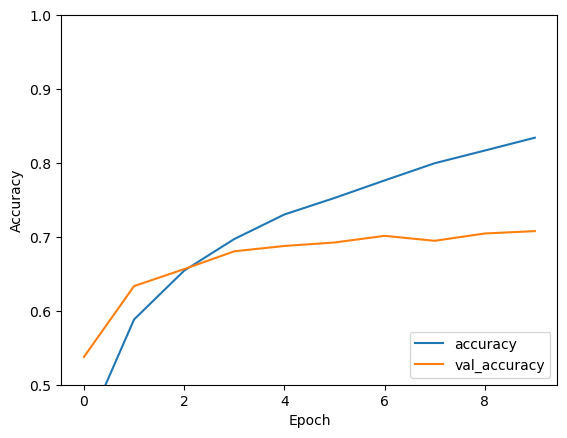

In [4]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

In [5]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 15, 15, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 128)         73856     
                                                                 
 flatten (Flatten)           (None, 2048)              0